In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data.csv')

## 2. Датасет и подготовка данных: 

### 2.1 Привести описание датасета

Heart Failure Prediction Dataset - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data
Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти № 1 во всем мире, ежегодно унося, по оценкам, 17,9 миллиона жизней, что составляет 31% всех смертей во всем мире. Четыре из пяти смертей от сердечно-сосудистых заболеваний происходят в результате сердечных приступов и инсультов, и треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. 
Вот табличное описание атрибутов датасета:

| Атрибут           | Описание                                                                                   | Тип данных         |
|-------------------|--------------------------------------------------------------------------------------------|-------------------|
| Age               | Возраст пациента [лет]                                                                     | Количественный    |
| Sex               | Пол пациента [М: Мужчина, F: Женщина]                                                       | Категориальный    |
| ChestPainType     | Тип боли в груди [TA: Типичная ангина, ATA: Атипичная ангина, NAP: Неангинальная боль, ASY: Асимптоматическая] | Категориальный    |
| RestingBP         | Артериальное давление в покое [мм рт. ст.]                                                 | Количественный    |
| Cholesterol       | Уровень холестерина в сыворотке крови [мг/дл]                                               | Количественный    |
| FastingBS         | Уровень глюкозы в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]     | Категориальный    |
| RestingECG        | Результаты электрокардиограммы в покое [Нормально: Нормально, ST: Аномалии волны ST-T (инверсии волны T и/или повышение или понижение ST более 0.05 мВ), LVH: Вероятное или определенное увеличение левого желудочка по критериям Estes] | Категориальный    |
| MaxHR             | Максимальная достигнутая частота сердечных сокращений [Числовое значение между 60 и 202] | Количественный    |
| ExerciseAngina    | Ангина, вызванная физической нагрузкой [Y: Да, N: Нет]                                       | Категориальный    |
| Oldpeak           | Oldpeak = ST [Числовое значение, измеренное в депрессии]                                    | Количественный    |
| ST_Slope          | Наклон пика сегмента ST при максимальной нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий] | Категориальный    |
| HeartDisease      | Выходной класс [1: сердечное заболевание, 0: Нормально]                                     | Котегориальный    |

Этот датасет содержит информацию о 11 признаках, которые могут использоваться для прогнозирования возможного сердечного заболевания.

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df['HeartDisease'] = df['HeartDisease'].astype(object)
df['FastingBS'] = df['FastingBS'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


### 2.2 Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

Предобработка данных не требуется

### 2.3 Нормализовать численные данные.


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Будем предсказывать кол-во холестерина в крови

y = df['Cholesterol']
X = df.drop(['Cholesterol'], axis=1)

In [7]:
numeric = [X.columns[i] for i in range(X.shape[1]) if X.dtypes[X.columns[i]] != 'object']
numeric

['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

In [8]:
scaler = StandardScaler()
scaler.fit(X[numeric])
X_scaled = X.copy()
X_scaled[numeric] = scaler.transform(X[numeric])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,0,Normal,-0.581981,N,-0.832432,Up,0


### 2.4 Визуализировать heatmap-матрицу кореллированности признаков.

In [9]:
import seaborn as sns

<Axes: >

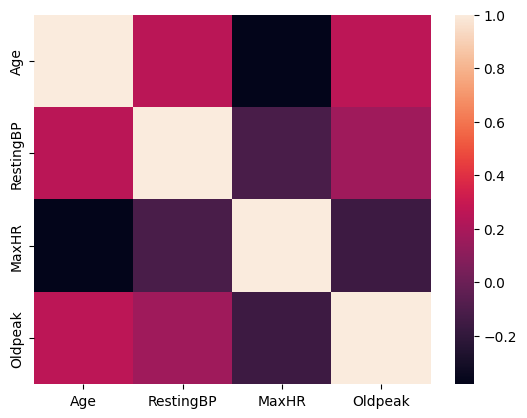

In [10]:
sns.heatmap(X_scaled[numeric].corr())


### 2.5 Визуализировать взаимосвязь между target-переменной и каждым из признаком

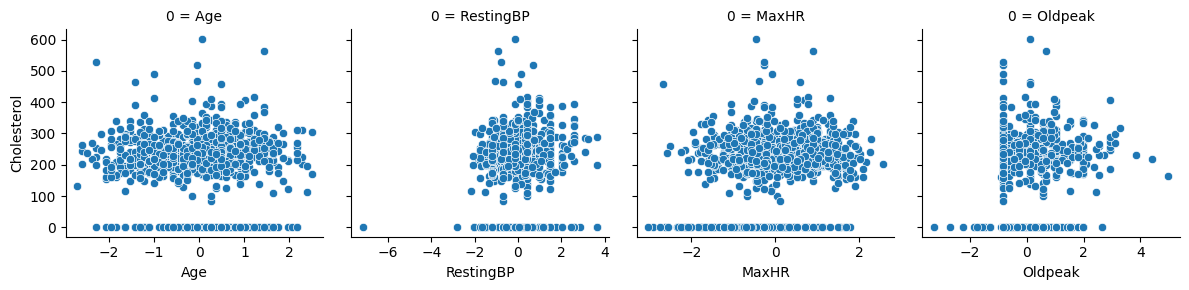

In [11]:
fig = sns.FacetGrid(pd.DataFrame(numeric), col=0, col_wrap=4, sharex=False)

for ax, varx in zip(fig.axes, numeric):
    sns.scatterplot(data=pd.concat([X_scaled[numeric], y], axis=1), x=varx, y='Cholesterol', ax=ax)
    
fig.tight_layout()

### 2.6 Разбить выборку на обучающую и тестовую

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(642,) (276,)


In [14]:
X_train_w, X_test_w = X_train[numeric], X_test[numeric] # Отсеили критерии от котегориальных признаков

## 3. Регрессия МНК

### 3.1 Обучить модель линейной регрессии LinearRegression.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

model.fit(X_train_w, y_train)
y_pred = model.predict(X_test_w)

### 3.2 Вывести метрики MSE, MAE и R^2 на тестовом наборере.

In [17]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2

In [18]:
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE): 12293.877
Средняя абсолютная ошибка (MAE): 85.028
Коэффициент детерминации (R2 score): 0.078


### 3.3 Вывести model.coef_ и model.intercept_.

In [19]:
print(model.coef_)
print(model.intercept_)
print(f'Cholesterol = {model.intercept_}{model.coef_[0]}*{numeric[0]}{model.coef_[1]}*{numeric[1]}+{model.coef_[2]}*{numeric[2]}{model.coef_[3]}*{numeric[3]}')

[-7.00467917 13.16423436 25.7886806   6.63350568]
202.06144295831658
Cholesterol = 202.06144295831658-7.004679170886566*Age13.16423435861753*RestingBP+25.788680598646376*MaxHR6.633505679701845*Oldpeak


### 3.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

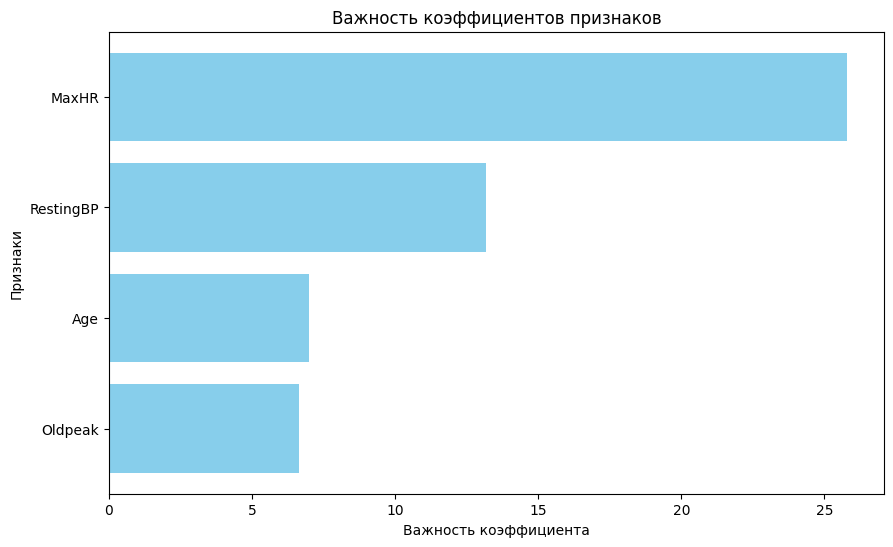

In [20]:
import numpy as np
import matplotlib.pyplot as plt

coefficients = model.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков')
plt.gca().invert_yaxis()
plt.show()

## 4. Для каждого вида регрессии (Ridge, LASSO, Elastic Net):

### 4.1 С использованием GridSearchCV осуществить подбор параметров регуляризации (alpha для Ridge и LASSO, alpha и l1_ratio для Elastic Net)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [22]:
grid_ridge_lasso = {'alpha': np.arange(0.1, 5, 0.1)}

ridge = Ridge()
search_ridge = GridSearchCV(ridge, grid_ridge_lasso)
search_ridge.fit(X_train_w, y_train)

lasso = Lasso()
search_lasso = GridSearchCV(lasso, grid_ridge_lasso)
search_lasso.fit(X_train_w, y_train)

grid_elastic_net = {'alpha': np.arange(0.1, 5, 0.1), 'l1_ratio': [0.25, 0.5, 0.75]}

elastic_net = ElasticNet()
search_elastic_net = GridSearchCV(elastic_net, grid_elastic_net)
search_elastic_net.fit(X_train_w, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'l1_ratio': [0.25, 0.5, 0.75]})

### 4.2 Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе для наилучшей модели (MSE, MAE и R^2)

In [23]:
print(f'best ridge:\t{search_ridge.best_params_}')
print(f'best lasso:\t{search_lasso.best_params_}')
print(f'best elastic net:\t{search_elastic_net.best_params_}')

best ridge:	{'alpha': 4.9}
best lasso:	{'alpha': 0.2}
best elastic net:	{'alpha': 0.2, 'l1_ratio': 0.25}


In [24]:
best_ridge = search_ridge.best_estimator_
best_lasso = search_lasso.best_estimator_
best_elastic_net = search_elastic_net.best_estimator_

In [25]:
print('---------RIDGE---------')
print(f'model.coef_:\t{best_ridge.coef_}')
print(f'model.inteercept_:\t{best_ridge.intercept_}')
print('---------LASSO---------')
print(f'model.coef_:\t{best_lasso.coef_}')
print(f'model.inteercept_:\t{best_lasso.intercept_}')
print('---------ELASTIC NET---------')
print(f'model.coef_:\t{best_elastic_net.coef_}')
print(f'model.inteercept_:\t{best_elastic_net.intercept_}')

---------RIDGE---------
model.coef_:	[-6.98717762 13.04318641 25.55719901  6.56344423]
model.inteercept_:	202.06725582380696
---------LASSO---------
model.coef_:	[-6.72959553 12.90988883 25.60668772  6.3836073 ]
model.inteercept_:	202.07184679120434
---------ELASTIC NET---------
model.coef_:	[-6.54253721 11.05567741 21.88953333  5.40328736]
model.inteercept_:	202.1607786220262


In [26]:
print('---------RIDGE---------')
y_pred = best_ridge.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

print('---------LASSO---------')
y_pred = best_lasso.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

print('---------ELASTIC NET---------')
y_pred = best_elastic_net.predict(X_test_w)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")

---------RIDGE---------
Средняя квадратичная ошибка (MSE): 12296.090
Средняя абсолютная ошибка (MAE): 85.015
Коэффициент детерминации (R2 score): 0.078
---------LASSO---------
Средняя квадратичная ошибка (MSE): 12298.452
Средняя абсолютная ошибка (MAE): 85.004
Коэффициент детерминации (R2 score): 0.078
---------ELASTIC NET---------
Средняя квадратичная ошибка (MSE): 12352.384
Средняя абсолютная ошибка (MAE): 84.847
Коэффициент детерминации (R2 score): 0.074


### 4.3 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

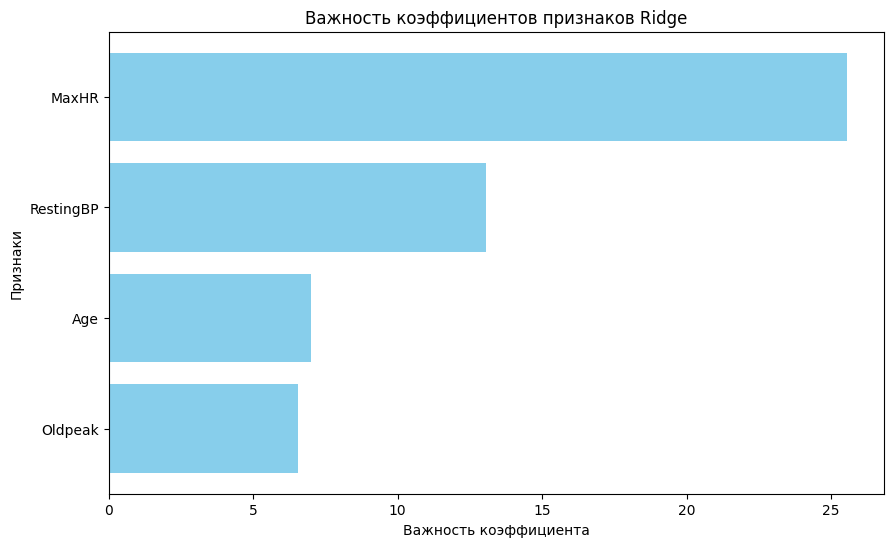

In [27]:
coefficients = best_ridge.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Ridge')
plt.gca().invert_yaxis()
plt.show()

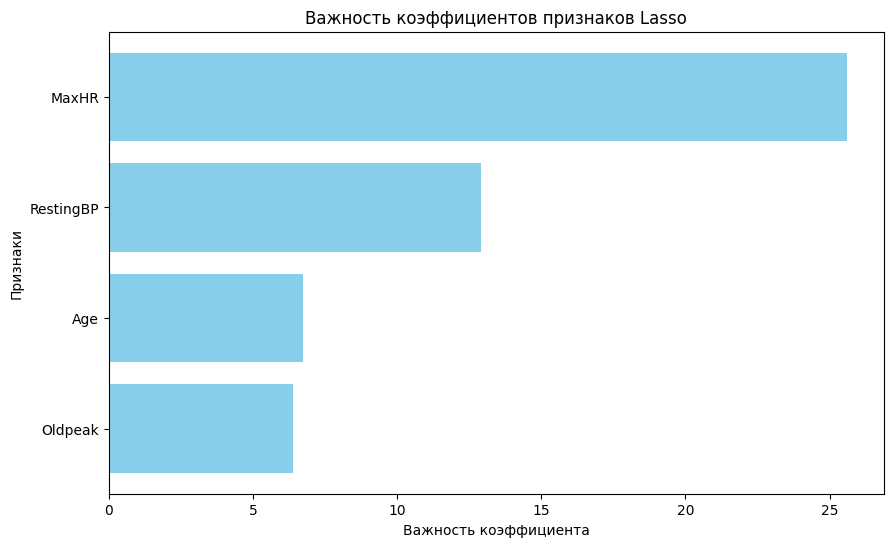

In [28]:
coefficients = best_lasso.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Lasso')
plt.gca().invert_yaxis()
plt.show()

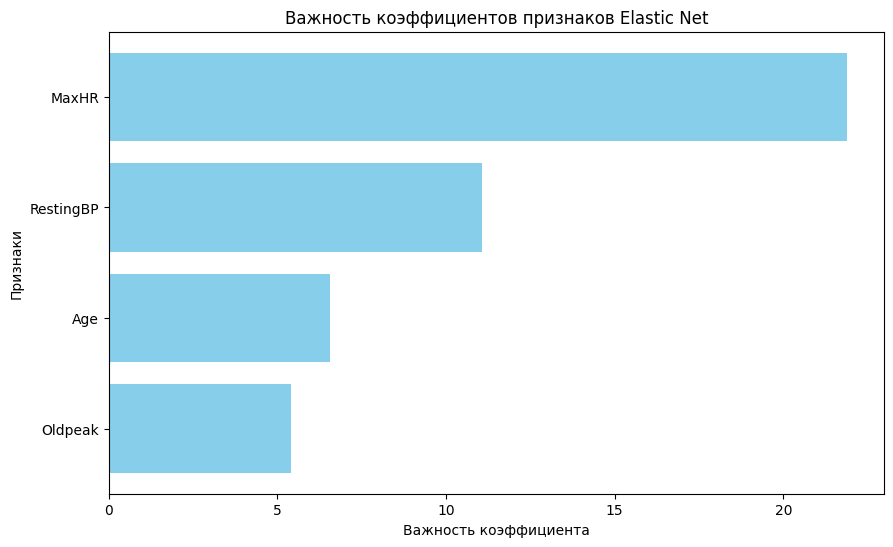

In [29]:
coefficients = best_elastic_net.coef_
feature_names = numeric

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков Elastic Net')
plt.gca().invert_yaxis()
plt.show()

## 5. Датасет и подготовка данных, этап 2:

### 5.1 Использовать датафреймы после разбиения на обучающую и тестовую выборки из 1 этапа с категориальными признаками.

In [30]:
obj_category = [var for var in df.columns if df[var].dtype == 'object']
obj_category

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [31]:
for c in obj_category:
    print(f'{c}: {len(df[c].unique())} unique object')

Sex: 2 unique object
ChestPainType: 4 unique object
FastingBS: 2 unique object
RestingECG: 3 unique object
ExerciseAngina: 2 unique object
ST_Slope: 3 unique object
HeartDisease: 2 unique object


В датасете 5 котегориальных признака. 
Sex и ExerciseAngina закодируем с применениеем OneHotEncoder
ChestPainType, RestingECG и ST_Slope будем кодировать с помощью LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
categ_for_lable_encode = ['ChestPainType','RestingECG','ST_Slope']
for category in categ_for_lable_encode:
    X_train[category] = labelEncoder.fit_transform(X_train[category])
    X_test[category] = labelEncoder.fit_transform(X_test[category])

In [33]:
categ_for_hot_encode = ['Sex', 'ExerciseAngina']
X_train = pd.get_dummies(data=X_train, columns=categ_for_hot_encode, drop_first=False, dtype='int')
X_test = pd.get_dummies(data=X_test, columns=categ_for_hot_encode, drop_first=False, dtype='int')

In [34]:
X_test.head()

,Age,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
668,1.006537,1,0.410909,0,1,1.658016,-0.832432,2,0,1,0,1,0
30,-0.054192,2,0.681120,0,1,-0.267596,-0.832432,1,1,0,1,1,0
377,1.218683,0,1.491752,1,2,-0.581981,0.293283,1,1,0,1,1,0
535,0.264027,0,-0.129513,0,0,-0.581981,0.105664,1,1,0,1,0,1
807,0.051881,1,-1.318441,0,1,0.754157,-0.832432,2,0,0,1,1,0


## 6. Регрессии, этап 2:

### 6.1 Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками.

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.2, l1_ratio=0.25)

### 6.2 Вывести значения гиперпараметров, коэффициенты регрессии (model.coef_ и model.intercept_) и значения метрик на тестовом наборе (MSE, MAE и R^2)

In [38]:
print('---------LINEAR REGRESSION---------')
y_pred = linear_model.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{linear_model.coef_}")
print(f"model.intercept_:\t{linear_model.intercept_}\n\n")

print('---------RIDGE---------')
y_pred = best_ridge.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_ridge.coef_}")
print(f"model.intercept_:\t{best_ridge.intercept_}\n\n")

print('---------LASSO---------')
y_pred = best_lasso.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_lasso.coef_}")
print(f"model.intercept_:\t{best_lasso.intercept_}\n\n")

print('---------ELASTIC NET---------')
y_pred = best_elastic_net.predict(X_test)
print(f"Средняя квадратичная ошибка (MSE): {MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score): {R2(y_test, y_pred):.3f}")
print(f"model.coef_:\t{best_elastic_net.coef_}")
print(f"model.intercept_:\t{best_elastic_net.intercept_}")

---------LINEAR REGRESSION---------
Средняя квадратичная ошибка (MSE): 10815.913
Средняя абсолютная ошибка (MAE): 82.053
Коэффициент детерминации (R2 score): 0.189
model.coef_:	[ -2.87995275  -2.41547957  13.25058277 -44.25727495 -24.86518473
  15.08916635  11.1150703    7.85621304 -38.72510958  16.24731642
 -16.24731642 -11.76620203  11.76620203]
model.intercept_:	259.02878497116984


---------RIDGE---------
Средняя квадратичная ошибка (MSE): 10824.313
Средняя абсолютная ошибка (MAE): 82.034
Коэффициент детерминации (R2 score): 0.188
model.coef_:	[ -3.03084615  -2.24080379  13.14906623 -42.65365888 -24.493642
  15.09764707  11.00110851   8.17986723 -36.99016217  16.10036438
 -16.10036438 -11.30280305  11.30280305]
model.intercept_:	256.6526266459195


---------LASSO---------
Средняя квадратичная ошибка (MSE): 10816.574
Средняя абсолютная ошибка (MAE): 82.037
Коэффициент детерминации (R2 score): 0.189
model.coef_:	[ -2.71283376  -2.11428379  13.04688116 -43.67101874 -24.38983738
  15.0

### 6.3 Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.

Таблица сравнения метрик R^2, MSE и MAE:

### Без категориальных признаков:

| Модель            | MSE     | MAE    | R^2      |
|-------------------|---------|--------|----------|
| Linear Regression | 12293.9 | 85.028 | 0.078    |
| Ridge             | 12296.1 | 85.015 | 0.078    |
| Lasso             | 12298.5 | 85.004 | 0.078    |
| Elastic Net       | 12352.4 | 84.847 | 0.074    |

### С категориальными признаками:

| Модель            | MSE     | MAE    | R^2      |
|-------------------|---------|--------|----------|
| Linear Regression | 10815.9 | 82.053 | 0.189    |
| Ridge             | 10824.3 | 82.034 | 0.188    |
| Lasso             | 10816.6 | 82.037 | 0.189    |
| Elastic Net       | 11095.2 | 82.324 | 0.168    |

Для всех моделей метрики значительно улучшились с наличием категориальных признаков

### 6.4 Выбрать лучшую модель.

In [46]:
best_model = linear_model
best_model

LinearRegression()

### 6.5 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

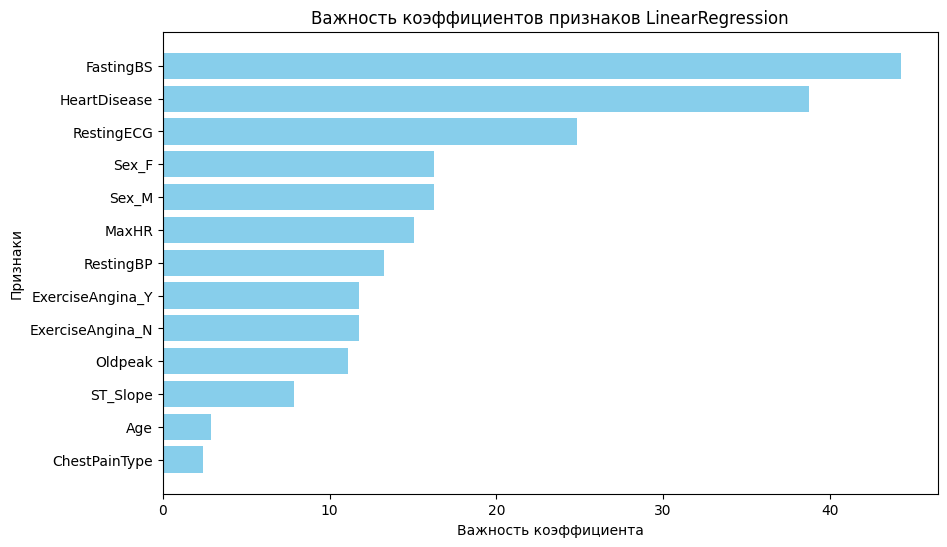

In [47]:
coefficients = best_model.coef_
feature_names = X_train.columns

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков LinearRegression')
plt.gca().invert_yaxis()
plt.show()

### 6.6 Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.


In [48]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
model = LinearRegression()

rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=5)),
                ('model', LinearRegression())])

### 6.7 Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

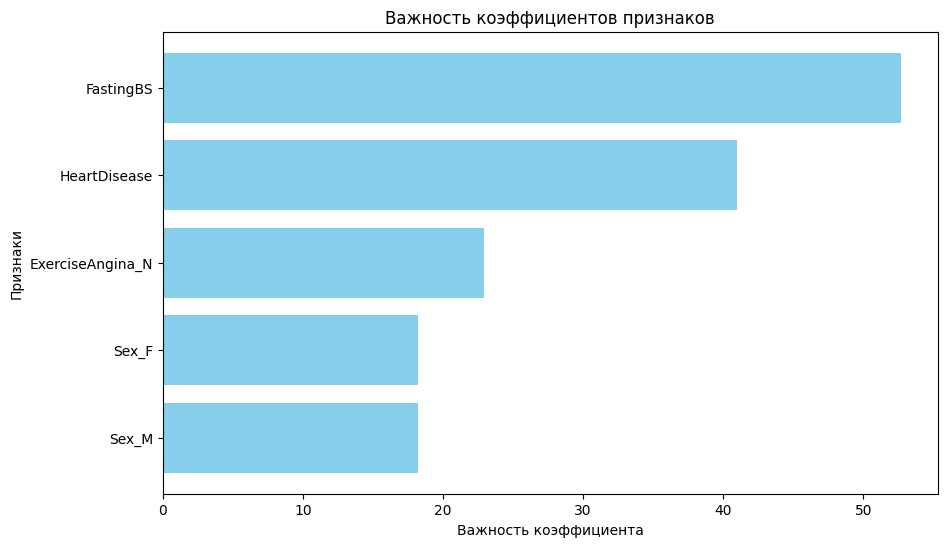

In [50]:
coefficients = model.coef_
feature_names = rf_pipeline.named_steps['rfe'].get_feature_names_out()

sorted_indexes = np.argsort(np.abs(coefficients))[::-1].tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_indexes], np.abs(coefficients)[sorted_indexes], color='skyblue')
plt.xlabel('Важность коэффициента')
plt.ylabel('Признаки')
plt.title('Важность коэффициентов признаков')
plt.gca().invert_yaxis()
plt.show()

### 6.8 Вывести значения метрик на тестовом наборе (MSE, MAE и R^2)

In [51]:
y_pred = rf_pipeline.predict(X_test)

print(f"Средняя квадратичная ошибка (MSE):\t{MSE(y_test, y_pred):.3f}")
print(f"Средняя абсолютная ошибка (MAE):\t{MAE(y_test, y_pred):.3f}")
print(f"Коэффициент детерминации (R2 score):\t{R2(y_test, y_pred):.3f}")

Средняя квадратичная ошибка (MSE):	11956.470
Средняя абсолютная ошибка (MAE):	86.668
Коэффициент детерминации (R2 score):	0.103


## 7. Сделать вывод:


Что с категориальными, что без них - лучшим является Линейная регрессия.
После Recursive Feature Elimination значения метрик стали немного, но хуже.
